In [92]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

In [16]:
%matplotlib inline

In [17]:
df = pd.read_csv('car_fuel_efficiency.csv')

In [18]:
df.head()

,engine_displacement,num_cylinders,horsepower,vehicle_weight,acceleration,model_year,origin,fuel_type,drivetrain,num_doors,fuel_efficiency_mpg
0,170,3.0,159.0,3413.433759,17.7,2003,Europe,Gasoline,All-wheel drive,0.0,13.231729
1,130,5.0,97.0,3149.664934,17.8,2007,USA,Gasoline,Front-wheel drive,0.0,13.688217
2,170,NaN,78.0,3079.038997,15.1,2018,Europe,Gasoline,Front-wheel drive,0.0,14.246341
3,220,4.0,NaN,2542.392402,20.2,2009,USA,Diesel,All-wheel drive,2.0,16.912736
4,210,1.0,140.0,3460.870990,14.4,2009,Europe,Gasoline,All-wheel drive,2.0,12.488369


In [20]:
selected_columns = [
    'engine_displacement',
    'horsepower',
    'vehicle_weight',
    'model_year',
    'fuel_efficiency_mpg'
]

df = df[selected_columns].copy()

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9704 entries, 0 to 9703
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   engine_displacement  9704 non-null   int64  
 1   horsepower           8996 non-null   float64
 2   vehicle_weight       9704 non-null   float64
 3   model_year           9704 non-null   int64  
 4   fuel_efficiency_mpg  9704 non-null   float64
dtypes: float64(3), int64(2)
memory usage: 379.2 KB


In [22]:
print("\nMissing values per column:")
print(df.isnull().sum())


Missing values per column:
engine_displacement      0
horsepower             708
vehicle_weight           0
model_year               0
fuel_efficiency_mpg      0
dtype: int64


In [23]:
df = df.dropna()

In [24]:
print("\nSummary Statistics for Numeric Columns:")
print(df.describe())


Summary Statistics for Numeric Columns:
       engine_displacement   horsepower  vehicle_weight   model_year  \
count          8996.000000  8996.000000     8996.000000  8996.000000   
mean            199.837706   149.657292     3000.662057  2011.475656   
std              49.455021    29.879555      498.870631     6.652192   
min              10.000000    37.000000      952.681761  2000.000000   
25%             170.000000   130.000000     2665.291955  2006.000000   
50%             200.000000   149.000000     2992.849725  2011.000000   
75%             230.000000   170.000000     3335.165088  2017.000000   
max             380.000000   271.000000     4739.077089  2023.000000   

       fuel_efficiency_mpg  
count          8996.000000  
mean             14.988530  
std               2.562296  
min               6.200971  
25%              13.271888  
50%              15.003604  
75%              16.713268  
max              25.967222  


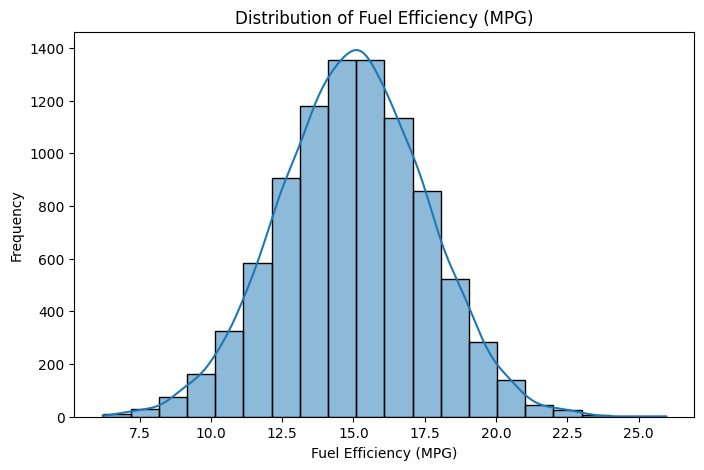

In [25]:
plt.figure(figsize=(8, 5))
sns.histplot(df['fuel_efficiency_mpg'], bins=20, kde=True)
plt.title('Distribution of Fuel Efficiency (MPG)')
plt.xlabel('Fuel Efficiency (MPG)')
plt.ylabel('Frequency')
plt.show()

In [26]:
skewness = df['fuel_efficiency_mpg'].skew()
print(f"\nSkewness of fuel_efficiency_mpg: {skewness:.2f}")

if skewness > 1:
    print("👉 The target variable has a long right tail (positively skewed).")
elif skewness < -1:
    print("👉 The target variable has a long left tail (negatively skewed).")
else:
    print("👉 The distribution is fairly symmetric (no long tail).")


Skewness of fuel_efficiency_mpg: -0.01
👉 The distribution is fairly symmetric (no long tail).


### 

In [ ]:
### What's the median (50% percentile) for variable 'horsepower'?

In [31]:
df['horsepower'].median()

np.float64(149.0)

## Prepare and split the dataset

In [32]:
# Shuffle the dataset (the filtered one you created above), use seed 42.
# Split your data in train/val/test sets, with 60%/20%/20% distribution.

### 1. Set random seed for reproducibility

In [33]:
np.random.seed(42)

### 2. Shuffle the dataset

In [34]:
# Create a shuffled index
n = len(df)
shuffled_indices = np.arange(n)
np.random.shuffle(shuffled_indices)

In [35]:
# Apply shuffled order to the dataframe
df = df.iloc[shuffled_indices].reset_index(drop=True)

### 3. Split into Train / Validation / Test sets

In [36]:
n_train = int(0.6 * n)
n_val = int(0.2 * n)
n_test = n - n_train - n_val

df_train = df.iloc[:n_train]
df_val = df.iloc[n_train:n_train + n_val]
df_test = df.iloc[n_train + n_val:]

### 4. Display the sizes of the splits

In [39]:
print(f"Total samples: {n}")
print(f"Training set: {len(df_train)}")
print(f"Validation set: {len(df_val)}")
print(f"Test set: {len(df_test)}")

Total samples: 8996
Training set: 5397
Validation set: 1799
Test set: 1800


In [38]:
# Preview a few rows
df_train.head()

,engine_displacement,horsepower,vehicle_weight,model_year,fuel_efficiency_mpg
0,180,126.0,3598.396675,2022,12.283744
1,210,186.0,2762.411125,2022,16.728061
2,180,90.0,2929.113569,2009,13.752975
3,130,128.0,3492.682087,2016,12.199854
4,160,169.0,3543.740195,2008,12.029881


## Question 3

##### * We need to deal with missing values for the column from Q1.
##### * We have two options: fill it with 0 or with the mean of this variable.
##### * Try both options. For each, train a linear regression model without regularization using the code from the lessons.
##### * For computing the mean, use the training only!
##### * Use the validation dataset to evaluate the models and compare the RMSE of each option.
##### * Round the RMSE scores to 2 decimal digits using round(score, 2)
##### * Which option gives better RMSE?

In [67]:
# Handle Missing Values and Train Models

# Separate features and target
features = ['engine_displacement', 'horsepower', 'vehicle_weight', 'model_year']
target = 'fuel_efficiency_mpg'

In [50]:
# Option 1: Fill missing horsepower with 0
# --------------------------------------------
df_train_0 = df_train.copy()
df_val_0 = df_val.copy()

In [51]:
# Fill missing values with 0
df_train_0['horsepower'] = df_train_0['horsepower'].fillna(0)
df_val_0['horsepower'] = df_val_0['horsepower'].fillna(0)

In [52]:
# Train Linear Regression
model_0 = LinearRegression()
model_0.fit(df_train_0[features], df_train_0[target])

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [53]:
# Predict on validation set
y_val_pred_0 = model_0.predict(df_val_0[features])

In [56]:
# Compute RMSE
rmse_0 = mean_squared_error(df_val_0[target], y_val_pred_0) ** 0.5
print(f"RMSE (fill 0): {round(rmse_0, 2)}")

RMSE (fill 0): 0.45


### Option 2: Fill missing horsepower with TRAINING mean

In [59]:
df_train_mean = df_train.copy()
df_val_mean = df_val.copy()

In [60]:
# Compute mean from training set only
horsepower_mean = df_train_mean['horsepower'].mean()

In [61]:
# Fill missing values
df_train_mean['horsepower'] = df_train_mean['horsepower'].fillna(horsepower_mean)
df_val_mean['horsepower'] = df_val_mean['horsepower'].fillna(horsepower_mean)

In [62]:
# Train Linear Regression
model_mean = LinearRegression()
model_mean.fit(df_train_mean[features], df_train_mean[target])

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [63]:
# Predict on validation set
y_val_pred_mean = model_mean.predict(df_val_mean[features])

In [64]:
# Compute RMSE
rmse_mean = mean_squared_error(df_val_mean[target], y_val_pred_mean) ** 0.5
print(f"RMSE (fill mean): {round(rmse_mean, 2)}")

RMSE (fill mean): 0.45


In [65]:
# Compare results

if rmse_0 < rmse_mean:
    print("👉 Filling missing values with 0 gives better RMSE.")
else:
    print("👉 Filling missing values with TRAINING mean gives better RMSE.")


👉 Filling missing values with TRAINING mean gives better RMSE.


## Question 4

##### * Now let's train a regularized linear regression.
##### * For this question, fill the NAs with 0.
##### * Try different values of r from this list: [0, 0.01, 0.1, 1, 5, 10, 100].
##### * Use RMSE to evaluate the model on the validation dataset.
##### * Round the RMSE scores to 2 decimal digits.
##### * Which r gives the best RMSE?
##### * If multiple options give the same best RMSE, select the smallest r.

In [69]:
# Regularized Linear Regression (Ridge)

# Prepare data
features = ['engine_displacement', 'horsepower', 'vehicle_weight', 'model_year']
target = 'fuel_efficiency_mpg'

In [71]:
# Fill missing horsepower with 0 (as specified)
df_train_ridge = df_train.copy()
df_val_ridge = df_val.copy()

df_train_ridge['horsepower'] = df_train_ridge['horsepower'].fillna(0)
df_val_ridge['horsepower'] = df_val_ridge['horsepower'].fillna(0)

X_train = df_train_ridge[features]
y_train = df_train_ridge[target]
X_val = df_val_ridge[features]
y_val = df_val_ridge[target]

In [72]:
# List of regularization strengths
r_values = [0, 0.01, 0.1, 1, 5, 10, 100]
results = []

In [73]:
# Train models for each r and evaluate RMSE
for r in r_values:
    model = Ridge(alpha=r)
    model.fit(X_train, y_train)
    
    y_val_pred = model.predict(X_val)
    rmse = mean_squared_error(y_val, y_val_pred) ** 0.5
    results.append((r, round(rmse, 2)))

In [74]:
# Create a results DataFrame for clarity
df_results = pd.DataFrame(results, columns=['r', 'RMSE'])
print(df_results)

        r  RMSE
0    0.00  0.45
1    0.01  0.45
2    0.10  0.45
3    1.00  0.45
4    5.00  0.45
5   10.00  0.45
6  100.00  0.45


In [76]:
# Find the best RMSE and smallest r among ties
best_rmse = df_results['RMSE'].min()
best_r = df_results[df_results['RMSE'] == best_rmse]['r'].min()

print(f"\n✅ Best RMSE: {best_rmse}")
print(f"🏆 Best r value: {best_r}")


✅ Best RMSE: 0.45
🏆 Best r value: 0.0


In [77]:
df_results

,r,RMSE
0,0.00,0.45
1,0.01,0.45
2,0.10,0.45
3,1.00,0.45
4,5.00,0.45
5,10.00,0.45
6,100.00,0.45


## Question 5

##### * We used seed 42 for splitting the data. Let's find out how selecting the seed influences our score.
##### * Try different seed values: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9].
##### * For each seed, do the train/validation/test split with 60%/20%/20% distribution.
##### * Fill the missing values with 0 and train a model without regularization.
##### * For each seed, evaluate the model on the validation dataset and collect the RMSE scores.
##### * What's the standard deviation of all the scores? To compute the standard deviation, use np.std.
##### * Round the result to 3 decimal digits (round(std, 3))

In [80]:
# List of seed values
seeds = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
rmse_scores = []

In [82]:
# Define features and target
features = ['engine_displacement', 'horsepower', 'vehicle_weight', 'model_year']
target = 'fuel_efficiency_mpg'

for seed in seeds:
    # Shuffle dataset
    n = len(df)
    idx = np.arange(n)
    np.random.seed(seed)
    np.random.shuffle(idx)

    # Split indices
    n_train = int(0.6 * n)
    n_val = int(0.2 * n)
    n_test = n - n_train - n_val

    df_train = df.iloc[idx[:n_train]]
    df_val = df.iloc[idx[n_train:n_train + n_val]]
    df_test = df.iloc[idx[n_train + n_val:]]

    # Prepare data
    X_train = df_train[features].fillna(0)
    y_train = df_train[target].values
    X_val = df_val[features].fillna(0)
    y_val = df_val[target].values

    # Train model
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Predict and compute RMSE
    y_pred = model.predict(X_val)
    rmse = mean_squared_error(y_val, y_pred) ** 0.5
    rmse_scores.append(round(rmse, 2))

    print(f"Seed = {seed} --> RMSE = {round(rmse, 2)}")


Seed = 0 --> RMSE = 0.46
Seed = 1 --> RMSE = 0.45
Seed = 2 --> RMSE = 0.46
Seed = 3 --> RMSE = 0.47
Seed = 4 --> RMSE = 0.46
Seed = 5 --> RMSE = 0.44
Seed = 6 --> RMSE = 0.45
Seed = 7 --> RMSE = 0.45
Seed = 8 --> RMSE = 0.45
Seed = 9 --> RMSE = 0.44


In [83]:
# Compute standard deviation of RMSEs
std_rmse = round(np.std(rmse_scores), 3)
print("\nRMSE Scores:", rmse_scores)
print("Standard Deviation of RMSEs:", std_rmse)


RMSE Scores: [0.46, 0.45, 0.46, 0.47, 0.46, 0.44, 0.45, 0.45, 0.45, 0.44]
Standard Deviation of RMSEs: 0.009


## Question 6
##### * Split the dataset like previously, use seed 9.
##### * Combine train and validation datasets.
##### * Fill the missing values with 0 and train a model with r=0.001.
##### * What's the RMSE on the test dataset?

In [84]:
# Set seed
seed = 9
np.random.seed(seed)

In [85]:
# Define features and target
features = ['engine_displacement', 'horsepower', 'vehicle_weight', 'model_year']
target = 'fuel_efficiency_mpg'

In [86]:
# Shuffle dataset
n = len(df)
idx = np.arange(n)
np.random.shuffle(idx)

In [87]:
# Split indices
n_train = int(0.6 * n)
n_val = int(0.2 * n)
n_test = n - n_train - n_val

df_train = df.iloc[idx[:n_train]]
df_val = df.iloc[idx[n_train:n_train + n_val]]
df_test = df.iloc[idx[n_train + n_val:]]

In [88]:
# Combine train + validation
df_full_train = pd.concat([df_train, df_val]).reset_index(drop=True)

In [89]:
# Prepare datasets
X_full_train = df_full_train[features].fillna(0)
y_full_train = df_full_train[target].values
X_test = df_test[features].fillna(0)
y_test = df_test[target].values

In [90]:
# Train regularized model (r = 0.001)
model = Ridge(alpha=0.001)
model.fit(X_full_train, y_full_train)

,alpha,0.001
,fit_intercept,True
,copy_X,True
,max_iter,None
,tol,0.0001
,solver,'auto'
,positive,False
,random_state,None


In [94]:
# Predict and evaluate on test set
y_pred = model.predict(X_test)
rmse_test = mean_squared_error(y_test, y_pred) ** 0.5

print(f"RMSE on Test Dataset: {round(rmse_test, 2)}")

RMSE on Test Dataset: 0.45
